# **Laboratorio #4 - Modulación de Pulsos**

In [9]:
# pip install scikit-image

In [10]:
#Importar las librerías por utilizar
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import sin,cos,pi, linspace
import skimage
from skimage import io
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#Obtener la direccion de la imagen
path = os.getcwd()

#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

## ACTIVIDAD # 1 

### 1. Construya un sistema de modulación por muestreo de pulsos (PAM), el cual debe tener las siguientes características:


#### a. El usuario debe escoger el tipo de señal a muestrear, puede ser entre tres opciones: una señal senoidal, una cuadrada y una triangular. Estas señales ya deben tener una frecuencia pre-establecida cuyo valor debe ser elegido de acuerdo al requerimiento b).

#### b. El usuario debe escoger adicionalmente la frecuencia de muestreo, se deben recomendar 3 opciones que permitan visualizar el efecto de un muestreo apropiado, un sobre-muestreo y un sub-muestreo.

#### c. Para el pulso, se debe poder seleccionar el ancho del pulso, de igual forma, para tres casos: un pulso angosto, uno de mediana angostura y otro ancho. Los valores deben ser tales que, para el caso de una tasa de muestreo apropiada, permitan visualizar los efectos del ancho del pulso en la señal resultante muestreada.

#### d. Como resultado se debe de mostrar la señal en frecuencia resultante del muestreo, de manera que se puedan visualizar los efectos de un muestreo apropiado, un sobre-muestreo y un sub-muestreo. Con los posibles anchos de pulsos.

#### e. Una vez obtenido el espectro de la señal muestreada, aplique solamente un filtropara recuperar la señal original, y reconstrúyala.


Elabore un análisis de los resultados obtenidos para las diferentes combinaciones.

Tipos de senales:
1-Senoidal
2-Cuadrada 
3-Triangular
Tiempos de muestreo:
1-Submuestreo
2-Muestreo 
3-Sobremuestreo
Ancho de pulso:
1-Angosto
2-Normal 
3-Ancho


C:\Users\TEC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\TEC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


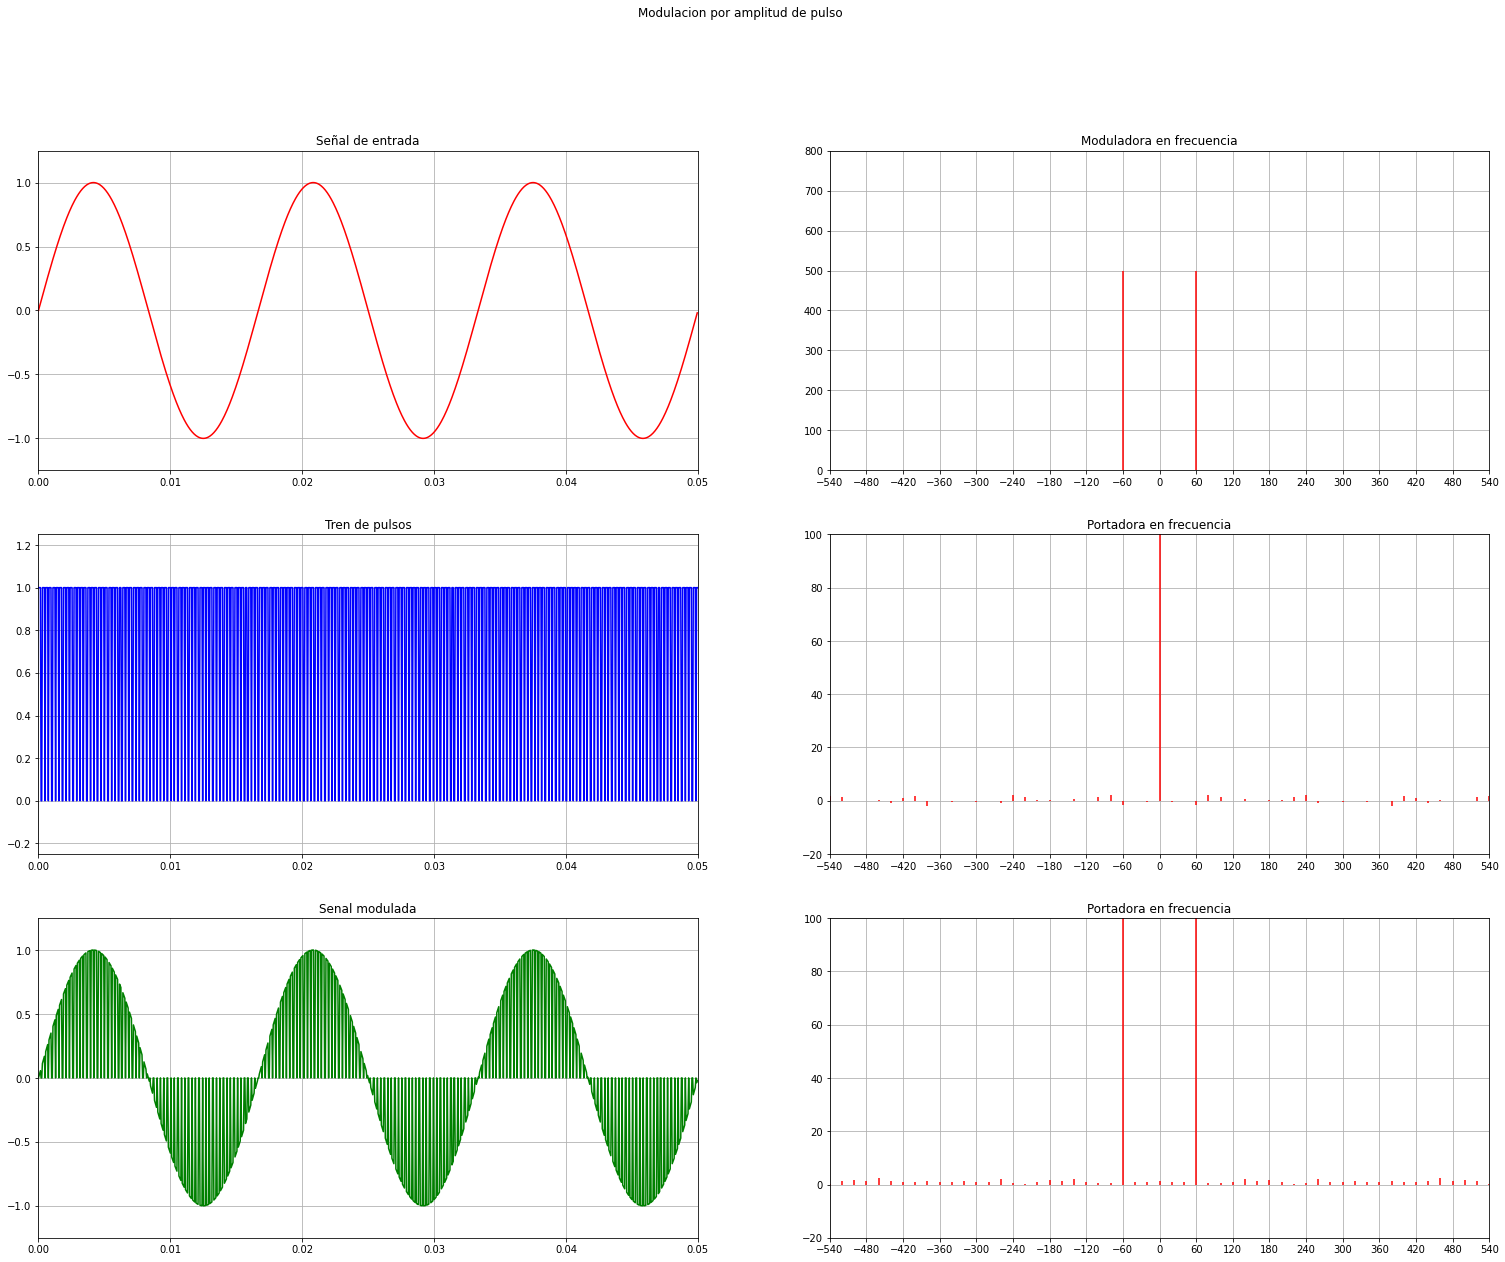

In [29]:
from scipy import signal
from scipy.fft import fft, fftfreq
samples = 1000
T = 1/20

#Funcion para realizar un FFT de una señal (Usado en la tarea 3)
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Etapa de creacion de senales
print("Tipos de senales:")
print("1-Senoidal\n2-Cuadrada \n3-Triangular")
tip = int(input("Seleccione el tipo de senal deseada"))
frec = 60

t = linspace(0, T, samples, endpoint=False)
if tip == 1:
    m = sin(t*2*pi*frec)
elif tip == 2:
    m = signal.square(t*2*pi*frec)
elif tip ==3:
    m = signal.sawtooth(t*2*pi*frec, 0.5)
fig0, axs = plt.subplots(3,2,figsize=(26,20))
fig0.suptitle('Modulacion por amplitud de pulso')

#Moduladora
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señal de entrada')
axs[0,0].set(xlim=(0,0.05),ylim=(-1.25,1.25))
axs[0,0].grid()
#Moduladora en frecuencia
Mtf, M = plotfft(m)
axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].set_title('Moduladora en frecuencia')
axs[0,1].grid()





#Seleccion del tiempo de muestreo
print("Tiempos de muestreo:")
print("1-Submuestreo\n2-Muestreo \n3-Sobremuestreo")
mus = int(input("Seleccione el tipo de muestreo"))
if mus == 1:
    tsamp = frec*2*pi*0.5
elif mus == 2:
    tsamp = 2*2*pi*frec
elif mus ==3:
    tsamp = 2*pi*frec*10


#Seleccion de ancho de pulso
print("Ancho de pulso:")
print("1-Angosto\n2-Normal \n3-Ancho")
an = int(input("Seleccione el ancho de pulso"))
if an == 1:
    wid = 0.1
elif an == 2:
    y = 0.5
elif an ==3:
    wid = 0.75

#Creacion del tren de pulsos
c = (signal.square(2*pi*t*tsamp, wid)+1)/2

#Grafica portadora
axs[1,0].plot(t,c,color='blue')
axs[1,0].set_title('Tren de pulsos')
axs[1,0].set(xlim=(0,0.05),ylim=(-0.25,1.25))
axs[1,0].grid()
#portadora en frecuencia
Ctf, C = plotfft(c)
axs[1,1].set(xlim=(-100,100),ylim=(-20,100),xticks=(range(-540,580,60)))
axs[1,1].vlines(Ctf,0,C,color='red')
axs[1,1].set_title('Portadora en frecuencia')
axs[1,1].grid()

#Senal muestreada
s = c*m
axs[2,0].plot(t,s,color='green')
axs[2,0].set_title('Senal modulada')
axs[2,0].set(xlim=(0,0.05),ylim=(-1.25,1.25))
axs[2,0].grid()
Stf, S = plotfft(s)
axs[2,1].set(xlim=(-100,100),ylim=(-20,100),xticks=(range(-540,580,60)))
axs[2,1].vlines(Stf,0,np.abs(S),color='red')
axs[2,1].set_title('Portadora en frecuencia')
axs[2,1].grid()








Filtro pasabajas para recuperar la senal

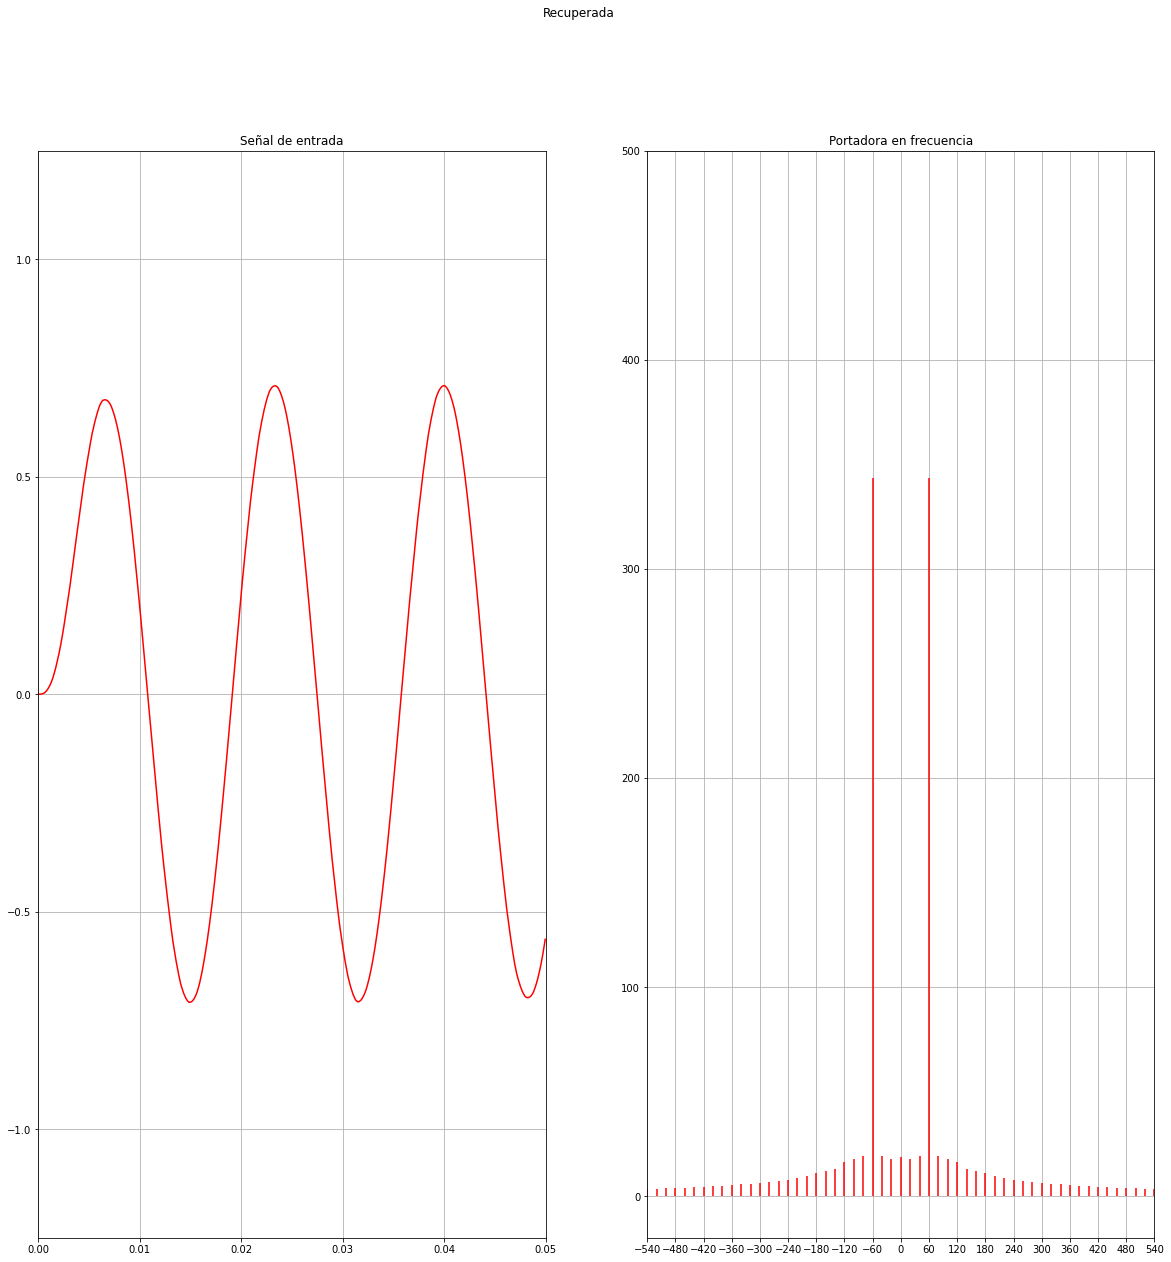

In [32]:
from scipy.signal import butter, lfilter, freqz
#Funciones para filtro basa bajas


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

#Señal desmodulada filtrada de orden 6, y frecuencia de corte de 100Hz
order = 2
fs = (T/samples)**-1
cutoff = 100
md = butter_lowpass_filter(s, cutoff, fs, order)
MDtf,MD = plotfft(md)

fig00, axs0 = plt.subplots(1,2,figsize=(20,20))
fig00.suptitle('Recuperada')

#Moduladora
axs0[0].plot(t,md,color='red')
axs0[0].set_title('Señal de entrada')
axs0[0].set(xlim=(0,0.05),ylim=(-1.25,1.25))
axs0[0].grid()

axs0[1].set(xlim=(-100,100),ylim=(-20,500),xticks=(range(-540,580,60)))
axs0[1].vlines(MDtf,0,np.abs(MD),color='red')
axs0[1].set_title('Portadora en frecuencia')
axs0[1].grid()


## ACTIVIDAD # 2

### 1. Para una señal de entrada:

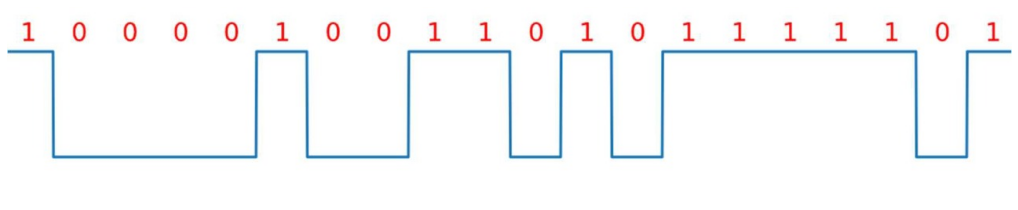

In [13]:
#Señal de entrada
file_path = os.path.join(path , 'Señal_de_entrada.jpeg')
img_org = io.imread(file_path)
plt.figure(figsize = (18,24))
plt.imshow(img_org)
plt.axis('off')
plt.show()

#### Represente los esquemas de ASK, FSK, y PSK, para la señal de entrada indicada, debe colocar las curvas de manera tal que se puedan visualizar en una misma figura, para un total de 5 graficas, la señal de entrada, la señal moduladora (senoidal) y las 3 señales ASK, FSK y PSK.

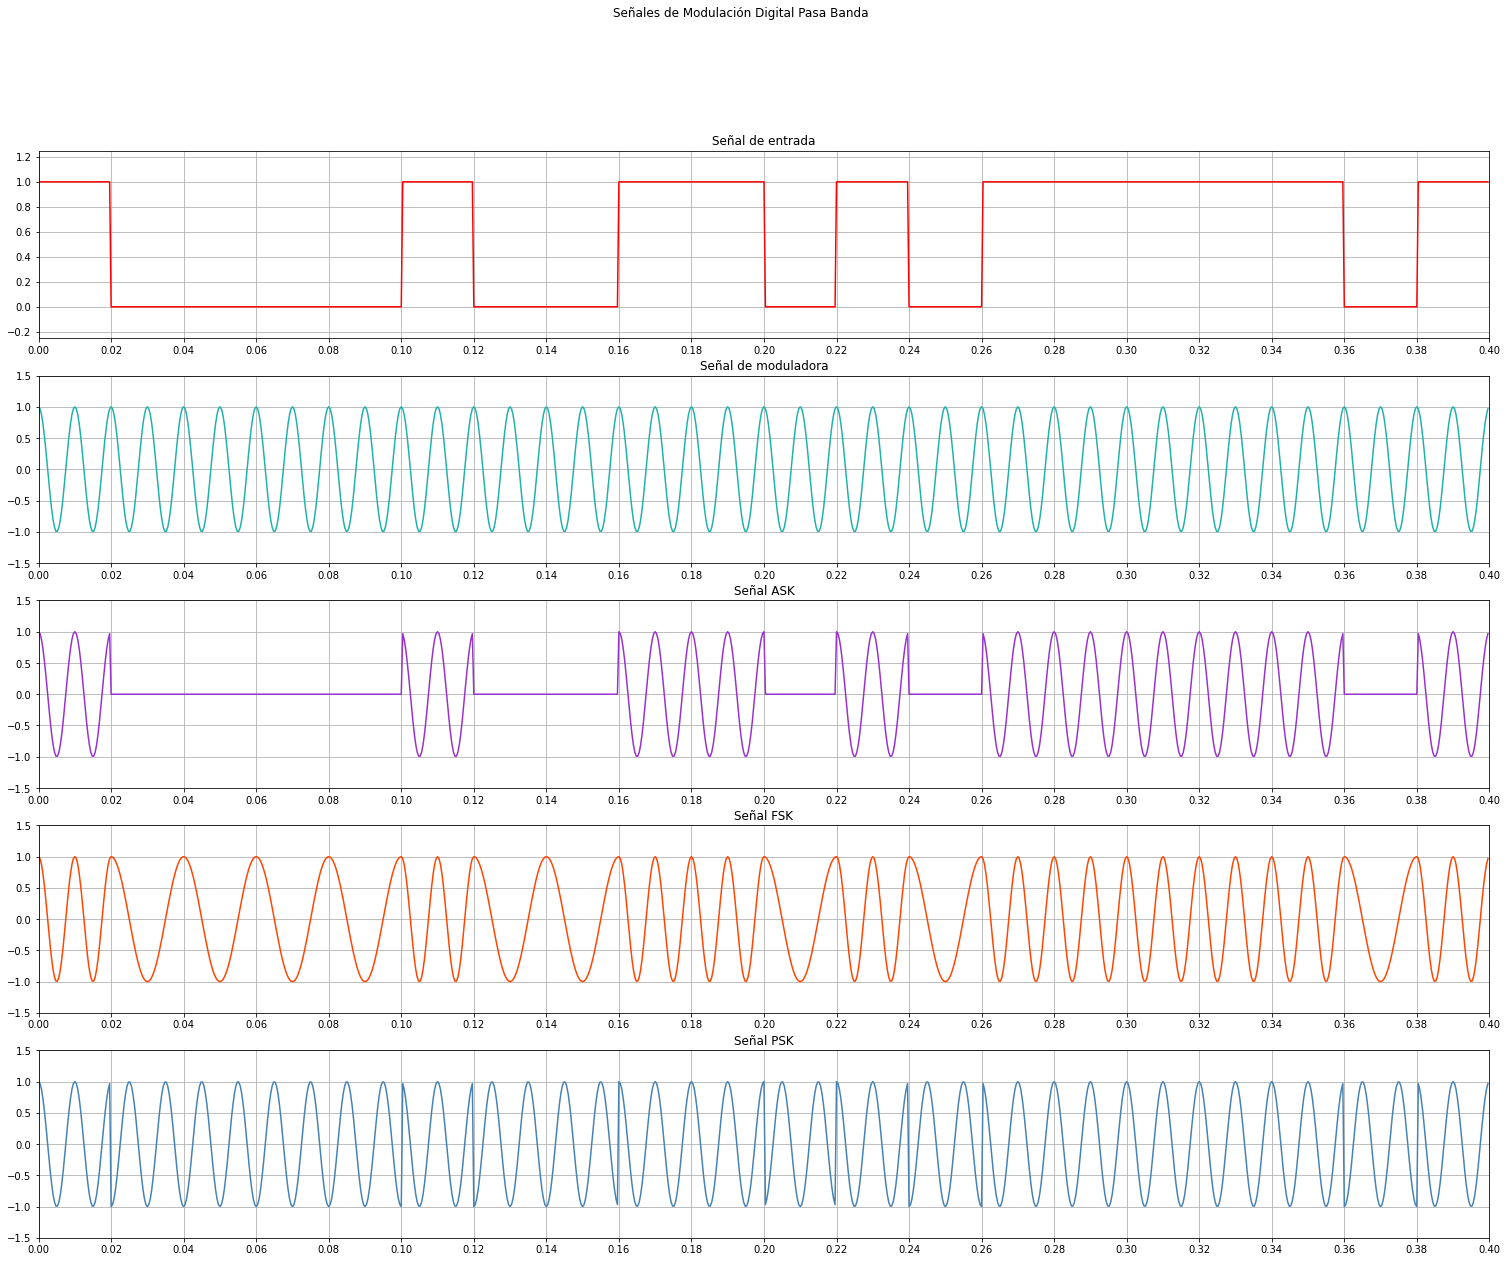

In [14]:
#Duracion y numero de puntos
T = 0.4
samples = 1000

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señal de entrada
code = [1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,1,1,0,1]
periodos = len(code)
IN1 = t*periodos//T
IN_SIGNAL =[]
for i in range(samples):
    IN_SIGNAL.append(code[int(IN1[i])])

#Señal moduladora
fm = 100
Am = 1
m = cosenoidal(fm,Am)

#Señal ASK
ASK = m*IN_SIGNAL

#Señal FSK
m2 = cosenoidal(fm/2,Am)
IN_SIGNAL_MOD2 = []
for i in range(samples):
    IN_SIGNAL_MOD2.append(-1*(IN_SIGNAL[i]-1))
FSK = m*IN_SIGNAL + m2*IN_SIGNAL_MOD2

#Señal PSK
IN_SIGNAL_MOD1 = []
for i in range(samples):
    IN_SIGNAL_MOD1.append(2*(IN_SIGNAL[i]-0.5))
PSK = IN_SIGNAL_MOD1*m

#Plot de las señales
fig3, axs = plt.subplots(5,1,figsize=(26,20))
fig3.suptitle('Señales de Modulación Digital Pasa Banda')

#Moduladora y su derivada
axs[0].plot(t,IN_SIGNAL,color='red')
axs[0].set_title('Señal de entrada')
axs[0].set(xlim=(0,0.4),ylim=(-0.25,1.25))
axs[0].xaxis.set_major_locator(MultipleLocator(0.02))
axs[0].grid()

axs[1].plot(t,m,color='lightseagreen')
axs[1].set_title('Señal de moduladora')
axs[1].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[1].xaxis.set_major_locator(MultipleLocator(0.02))
axs[1].grid()

axs[2].plot(t,ASK,color='darkorchid')
axs[2].set_title('Señal ASK')
axs[2].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[2].xaxis.set_major_locator(MultipleLocator(0.02))
axs[2].grid()

axs[3].plot(t,FSK,color='orangered')
axs[3].set_title('Señal FSK')
axs[3].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[3].xaxis.set_major_locator(MultipleLocator(0.02))
axs[3].grid()

axs[4].plot(t,PSK,color='steelblue')
axs[4].set_title('Señal PSK')
axs[4].set(xlim=(0,0.4),ylim=(-1.5,1.5))
axs[4].xaxis.set_major_locator(MultipleLocator(0.02))
axs[4].grid()

plt.show()